In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # y, sr = librosa.load(audio_file)
    # ms = librosa.feature.melspectrogram(y, sr=sr)
    # log_ms = librosa.power_to_db(ms, ref=np.max)
    # librosa.display.specshow(log_ms, sr=sr)

    audio_sig, sampling_rate = librosa.load(audio_file, sr=None)
    audio_stft = librosa.stft(audio_sig)
    S_dB = librosa.amplitude_to_db(np.abs(audio_stft),ref=np.max)
    librosa.display.specshow(S_dB)

    fig.savefig(image_file)
    plt.close(fig)
    
def pngs_of_spectogram(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        spectrogram(input_file, output_file)

In [2]:
import pandas as pd
import os


fulldatasetpath = r"D:\PYTHON\project\datasets\ESC-50-master\audio"

metadata = pd.read_csv('D:/PYTHON/project/file.csv')

features = []

for index, row in metadata.iterrows():
    
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["filename"]))
    
    class_label = row["category"]
    

In [14]:
import shutil
import os

def copy_file(src_folder, dest_folder, filename):

    src_file = os.path.join(src_folder, filename)
    dest_file = os.path.join(dest_folder, filename)
    
    if os.path.exists(src_file):
        shutil.copy(src_file, dest_file)
        print(f"Successfully copied {filename} from {src_folder} to {dest_folder}")
    else:
        print(f"Source file {src_file} does not exist")

for index, row in metadata.iterrows():
    class_label = row["category"]
    if class_label == 'clock_alarm':
        copy_file("D:/PYTHON/project/datasets/ESC-50-master/audio", "D:/PYTHON/project/sounds/clock_alarm", row['filename'])


Successfully copied 1-13613-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-14262-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-34853-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-67033-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-72195-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-72195-B-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-74517-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PYTHON/project/sounds/clock_alarm
Successfully copied 1-96890-A-37.wav from D:/PYTHON/project/datasets/ESC-50-master/audio to D:/PY

In [18]:
pngs_of_spectogram('Sounds/can_opening', 'Spectrograms/can_opening')

In [27]:
pngs_of_spectogram('Sounds/nonrelated', 'Spectrograms/nonrelated')

In [3]:
from keras.preprocessing import image

def images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def view_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

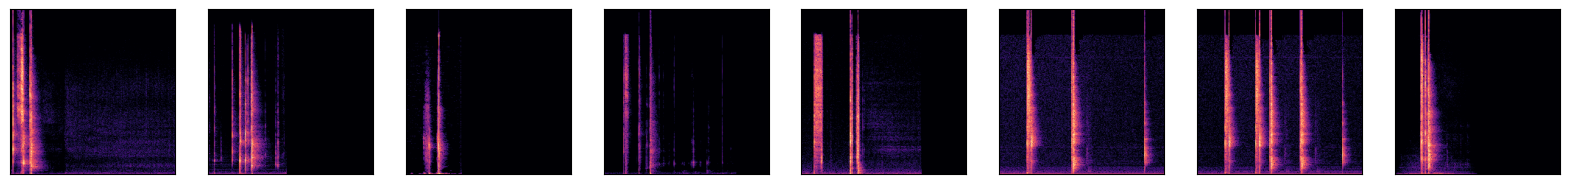

In [4]:
images, labels = images_from_path('Spectrograms/can_opening', 0)
view_images(images)
    
x += images
y += labels

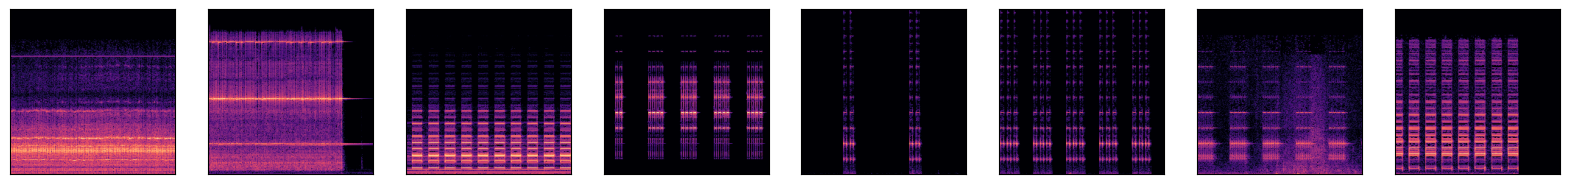

In [5]:
images, labels = images_from_path('Spectrograms/clock_alarm', 1)
view_images(images)
    
x += images
y += labels

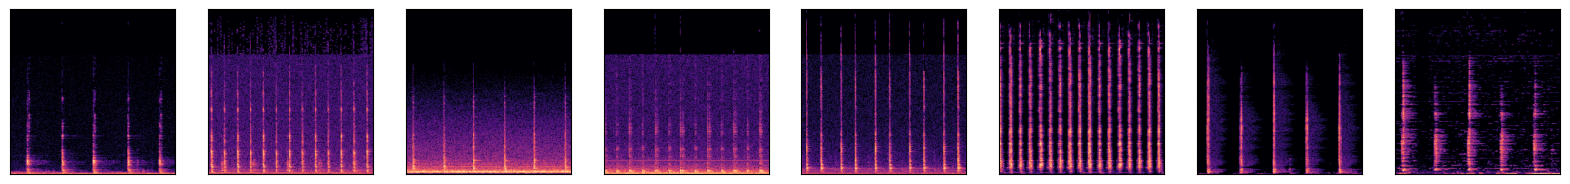

In [6]:
images, labels = images_from_path('Spectrograms/clock_tick', 2)
view_images(images)

x += images
y += labels

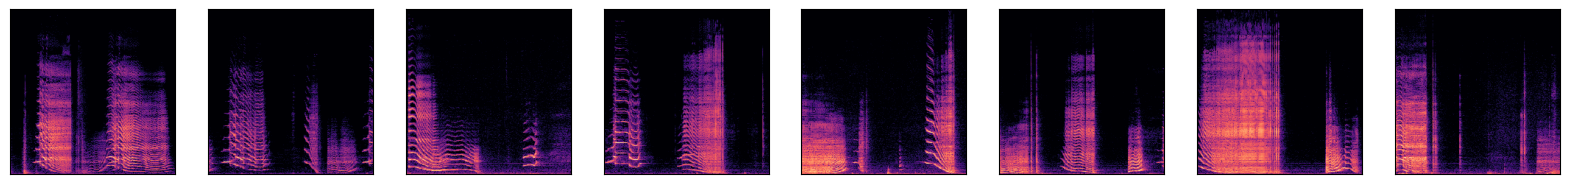

In [7]:
images, labels = images_from_path('Spectrograms/door_wood_creaks', 3)
view_images(images)

x += images
y += labels

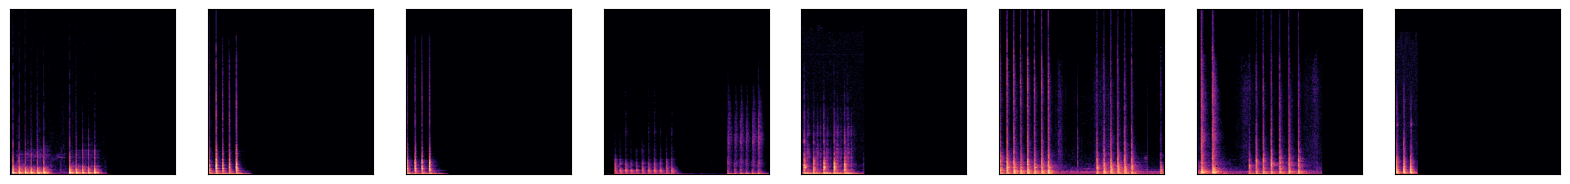

In [8]:
images, labels = images_from_path('Spectrograms/door_wood_knock', 4)
view_images(images)

x += images
y += labels

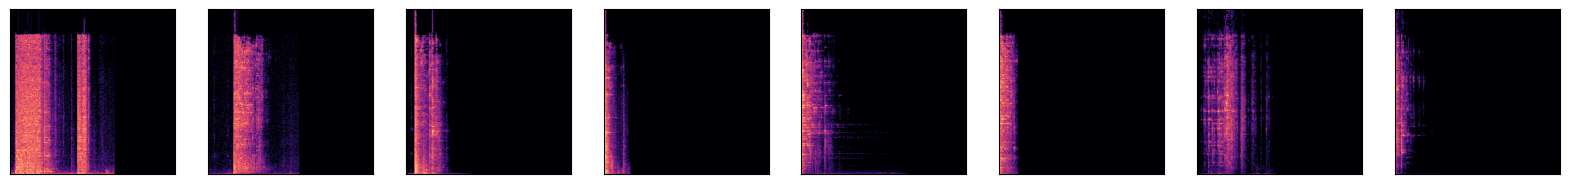

In [9]:
images, labels = images_from_path('Spectrograms/glassbreaking', 5)
view_images(images)

x += images
y += labels

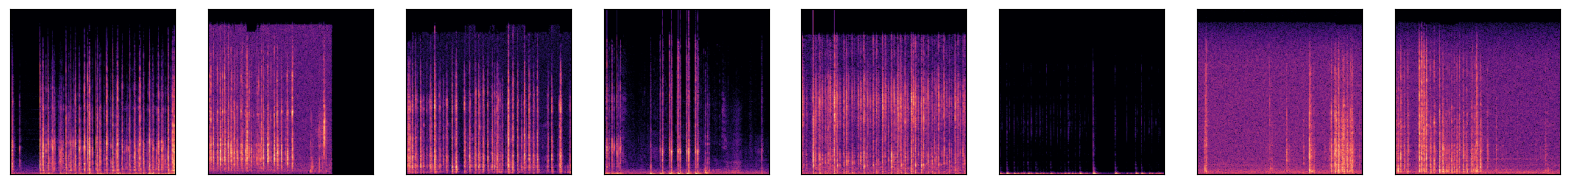

In [10]:
images, labels = images_from_path('Spectrograms/keyboardtyping', 6)
view_images(images)

x += images
y += labels

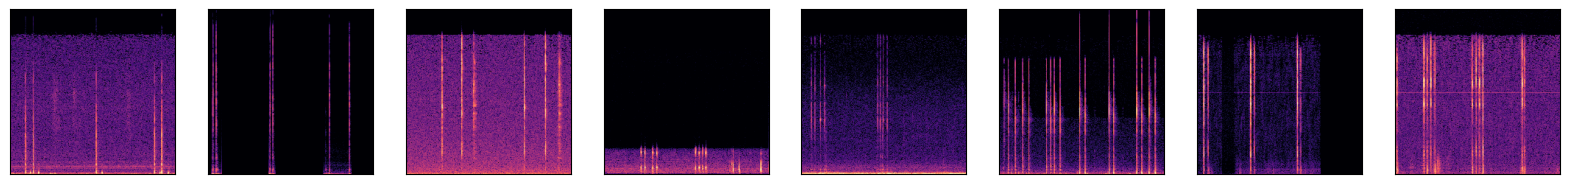

In [11]:
images, labels = images_from_path('Spectrograms/mouseclicking', 7)
view_images(images)

x += images
y += labels

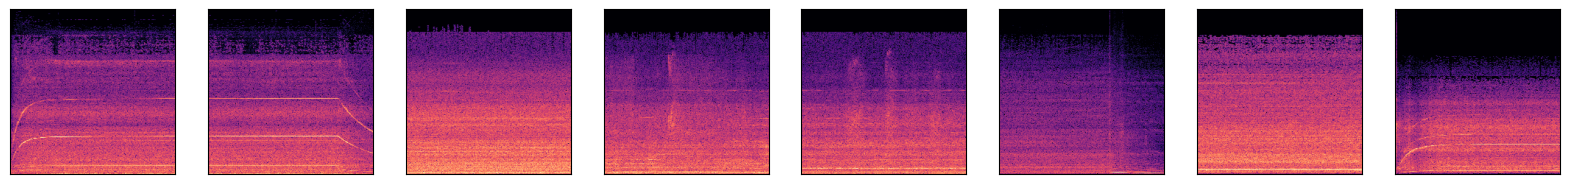

In [12]:
images, labels = images_from_path('Spectrograms/vaccumcleaner', 8)
view_images(images)

x += images
y += labels

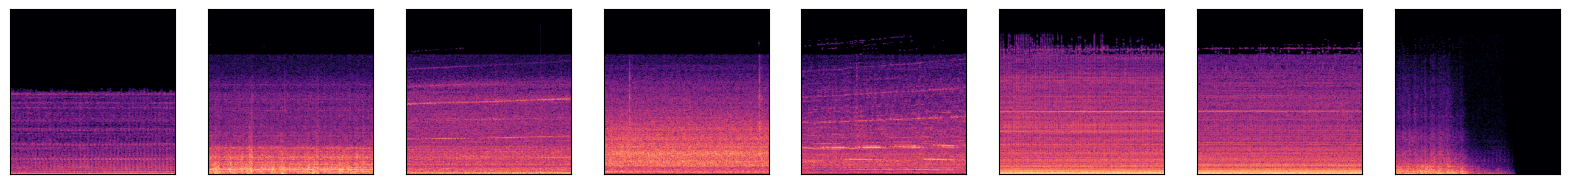

In [13]:
images, labels = images_from_path('Spectrograms/washing_machine', 9)
view_images(images)

x += images
y += labels

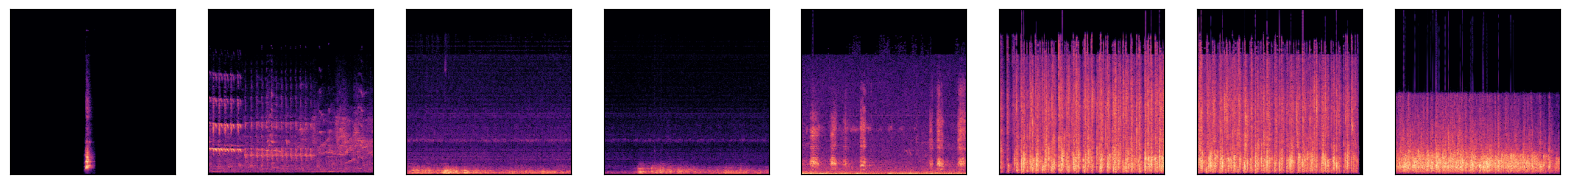

In [14]:
images, labels = images_from_path('Spectrograms/nonrelated', 10)
view_images(images)

x += images
y += labels

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print([len(x_train),len(x_test),len(y_train),len(y_test)])

[900, 386, 900, 386]


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\chiru\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │          11,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,219,723 (73.32 MB)

 Trainable params: 19,219,723 (73.32 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 456ms/step - accuracy: 0.6786 - loss: 1.5642 - val_accuracy: 0.6891 - val_loss: 1.1832
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.7111 - loss: 1.1325 - val_accuracy: 0.7124 - val_loss: 1.0489
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - accuracy: 0.7107 - loss: 0.9667 - val_accuracy: 0.7254 - val_loss: 0.8750
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 447ms/step - accuracy: 0.7096 - loss: 0.8756 - val_accuracy: 0.7124 - val_loss: 0.8784
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 438ms/step - accuracy: 0.8095 - loss: 0.6209 - val_accuracy: 0.7306 - val_loss: 0.9674
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.8269 - loss: 0.4993 - val_accuracy: 0.7228 - val_loss: 1.0503
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 483ms/step - accuracy: 0.8501 - loss: 0.4411 - val_accuracy: 0.7668 - val_loss: 1.0315
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.9229 - loss: 0.2387 - val_accu

[]

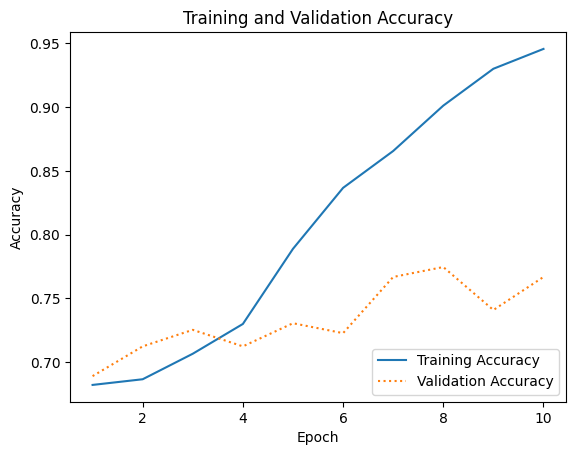

In [22]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step


In [24]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\chiru\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)
model.save('ui/model.keras')

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 544ms/step - accuracy: 0.5849 - loss: 23.9726 - val_accuracy: 0.7876 - val_loss: 2.2669
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 565ms/step - accuracy: 0.8830 - loss: 0.9167 - val_accuracy: 0.7824 - val_loss: 2.5021
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 545ms/step - accuracy: 0.9571 - loss: 0.2241 - val_accuracy: 0.8161 - val_loss: 2.1046
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 547ms/step - accuracy: 0.9655 - loss: 0.2343 - val_accuracy: 0.8238 - val_loss: 2.5332
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 545ms/step - accuracy: 0.9566 - loss: 0.2681 - val_accuracy: 0.8135 - val_loss: 3.1212
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 626ms/step - accuracy: 0.9558 - loss: 0.2724 - val_accuracy: 0.8472 - val_loss: 2.7043
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 630ms/step - accuracy: 0.9857 - loss: 0.0995 - val_accuracy: 0.8446 - val_loss: 1.7313
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 622ms/step - accuracy: 0.9786 - loss: 0.1616 - val_acc

[]

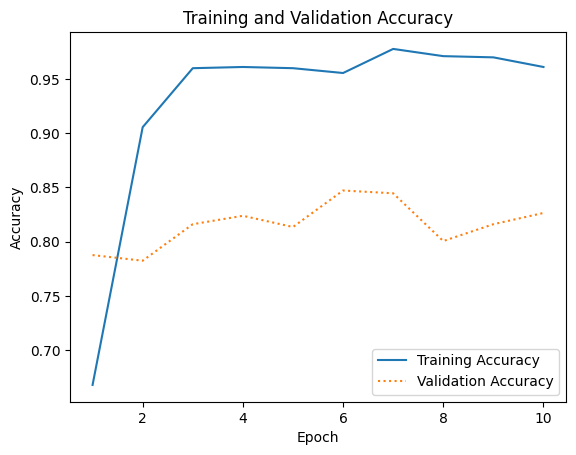

In [26]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


Text(110.30937499999997, 0.5, 'Actual label')

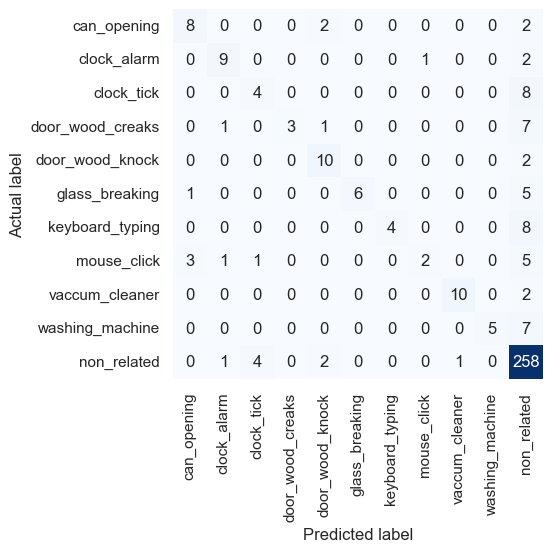

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['can_opening', 'clock_alarm', 'clock_tick', 'door_wood_creaks','door_wood_knock','glass_breaking','keyboard_typing','mouse_click','vaccum_cleaner','washing_machine','non_related']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

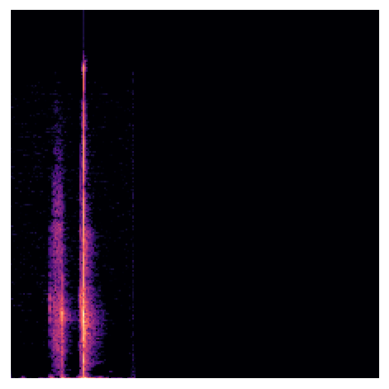

In [36]:
spectrogram('Sounds/can_opening/1-43764-A-34.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [37]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
can_opening: 1.0
clock_alarm: 4.4217105858723124e-30
clock_tick: 1.1333934696346103e-33
door_wood_creaks: 0.0
door_wood_knock: 3.49622647072517e-34
glass_breaking: 2.4522303566610523e-33
keyboard_typing: 1.4240659770460267e-37
mouse_click: 0.0
vaccum_cleaner: 4.739690200799406e-33
washing_machine: 0.0
non_related: 1.8619456894944469e-19
